In [1]:
import fiona
import geopandas as gpd
import pandas as pd
import seaborn as sns
from shapely.geometry import Point, LineString, Polygon
from geodatasets import get_path

# Import visualization and utility libraries
import matplotlib.pyplot as plt
import numpy as np
import folium

C:\Users\nefig\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
# Obtaining the dataset and displaying info

url = "https://data.wprdc.org/dataset/4c9b78ee-d044-418d-97c9-130ccdcb3435/resource/122717f9-f08a-4be1-82b9-c213cc069e8c/download/flood_zones.geojson"
gdf = gpd.read_file(url)
print(gdf)

     OBJECTID fld_ar_id fld_zone  floodway sfha_tf  static_bfe v_datum  depth  \
0           1       177        A                 T       -9999          -9999   
1           2       178        A                 T       -9999          -9999   
2           4       180        A                 T       -9999          -9999   
3           6       274       AE  FLOODWAY       T       -9999          -9999   
4           7       350       AE                 T       -9999          -9999   
..        ...       ...      ...       ...     ...         ...     ...    ...   
155       222      4146       AE  FLOODWAY       T       -9999          -9999   
156       224      3927       AE                 T       -9999          -9999   
157       225      3928        A                 T       -9999          -9999   
158       227      4083       AE                 T       -9999          -9999   
159       228      4084       AE                 T       -9999          -9999   

    len_unit  velocity vel_

In [3]:
# Understanding what is given by displaying head and column types
print(gdf.head())
print(gdf.columns)

   OBJECTID fld_ar_id fld_zone  floodway sfha_tf  static_bfe v_datum  depth  \
0         1       177        A                 T       -9999          -9999   
1         2       178        A                 T       -9999          -9999   
2         4       180        A                 T       -9999          -9999   
3         6       274       AE  FLOODWAY       T       -9999          -9999   
4         7       350       AE                 T       -9999          -9999   

  len_unit  velocity vel_unit ar_revert  bfe_revert  dep_revert source_cit  \
0              -9999                          -9999       -9999     STUDY1   
1              -9999                          -9999       -9999     STUDY1   
2              -9999                          -9999       -9999     STUDY1   
3              -9999                          -9999       -9999     STUDY1   
4              -9999                          -9999       -9999     STUDY1   

                               GlobalID    Shape__Area  

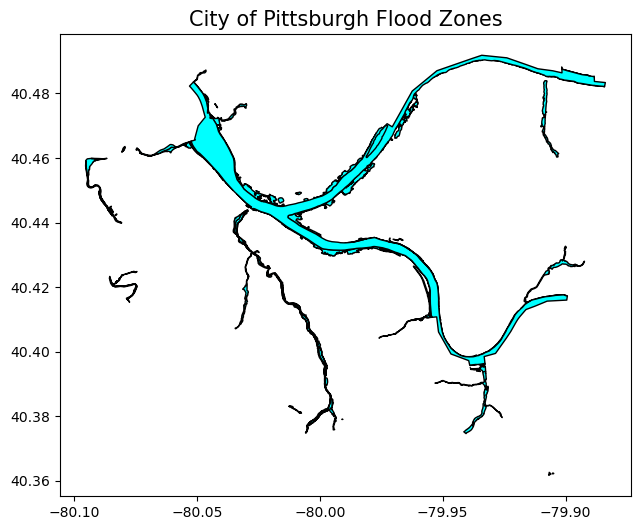

In [4]:
# General Overview of the different Flood Zones
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='cyan', edgecolor='black')
ax.set_title("City of Pittsburgh Flood Zones", fontsize=15)
plt.show()

In [5]:
# Flood zones are labeled as A and AE 
# Zone A stands for Minimal flood zones
# Zone AE stands for High Risk flood zones
print(gdf['fld_zone'].unique())

['A' 'AE']


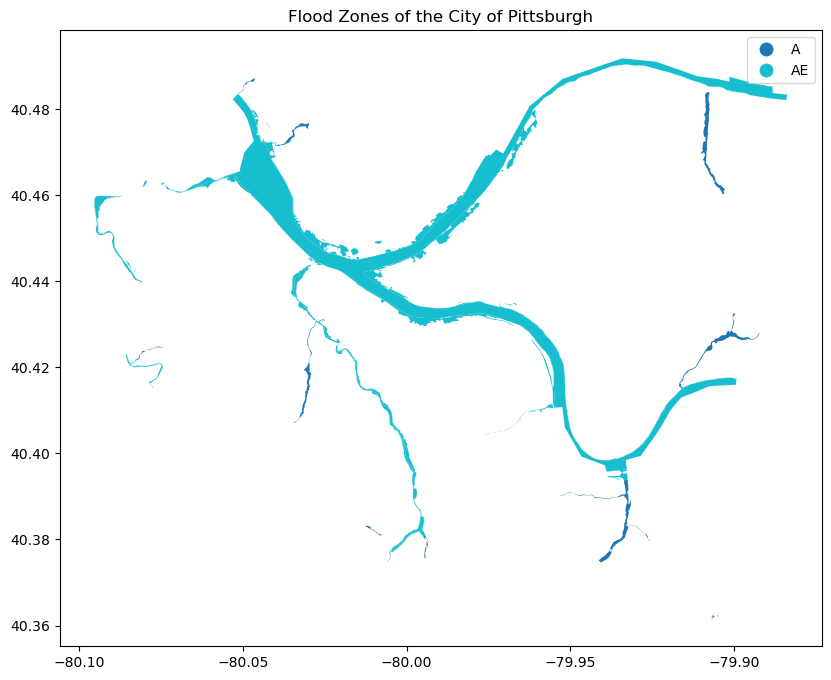

In [6]:
# Refering to column fld_zone as it differentiates between type A and type AE flood zones which help with
# understanding risk associated with each area and therefore insurance rate predictions

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf['fld_zone'] = gdf['fld_zone'].astype('category')
gdf.plot(column='fld_zone', ax=ax, legend=True, cmap = 'tab10')
plt.title("Flood Zones of the City of Pittsburgh")
plt.show()

In [7]:
# Went a bit more advanced here by including folium as that would make my images pop out more! 

# Converting to projected CRS for accurate centroid
gdf_proj = gdf.to_crs(epsg=3857)
centroid = gdf_proj.geometry.centroid

# Converted back to WGS84 for Folium
centroid_latlon = centroid.to_crs(epsg=4326)

# Calculating mean center for map
map_center = [centroid_latlon.y.mean(), centroid_latlon.x.mean()]

# Center map on data, did not want world the view starting point
m = folium.Map(location=map_center, zoom_start=12, tiles='cartodbpositron')

# Adding GeoJSON to the map
folium.GeoJson(gdf, name="Flood Zones", tooltip=folium.GeoJsonTooltip(fields=["fld_zone"], aliases=["Flood Zone"]),
    style_function=lambda x: {'fillColor': {'AE': 'blue', 'A': 'red'}.get(x['properties']['fld_zone'], 'white'),
        'color': 'black', 'weight': 1, 'fillOpacity': 0.5}
).add_to(m)

m

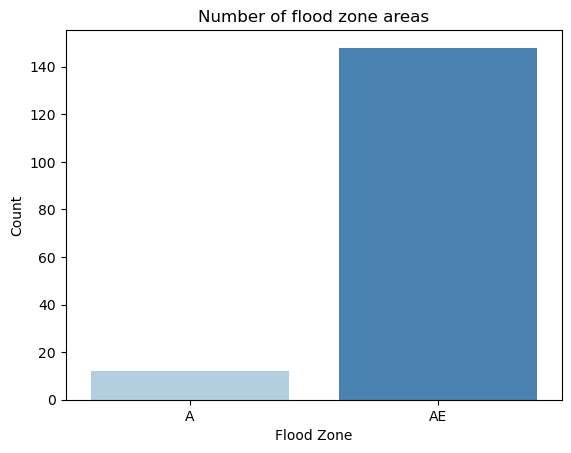

In [8]:
# Comparison of the number of times each fld_zone type appeared in the data
zone_counts_df = gdf['fld_zone'].value_counts().reset_index()
zone_counts_df.columns = ['fld_zone', 'count']

sns.barplot(data=zone_counts_df, x='fld_zone', y='count', hue='fld_zone', palette='Blues', legend=False)
plt.title("Number of flood zone areas")
plt.xlabel('Flood Zone')
plt.ylabel('Count')
plt.show()

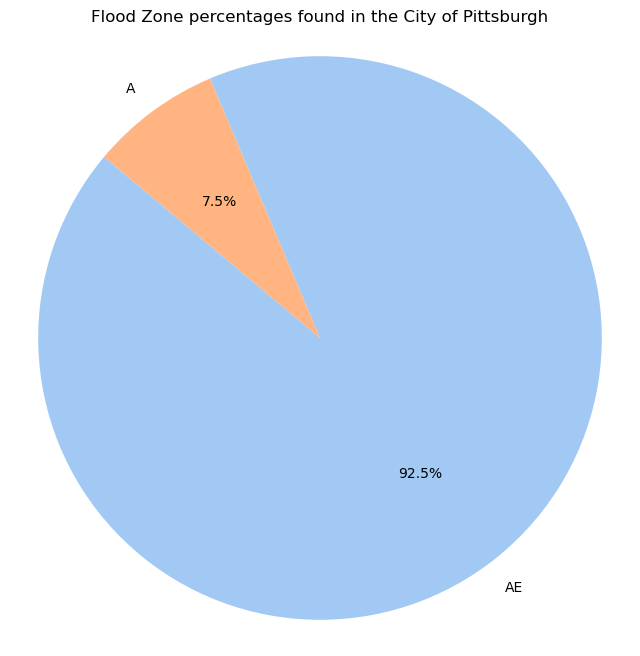

In [9]:
# Creating a pie chart as another visualization tool to show the value counts in percentages of the flood zones
zone_counts = gdf['fld_zone'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(zone_counts.values, labels=zone_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Flood Zone percentages found in the City of Pittsburgh")
plt.axis('equal')
plt.show()